In [19]:
#!pip install numpy
#!pip install panda
#!pip install matplotlib
#!pip install seaborn

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)
label_data = data.copy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
data.shape

(1338, 7)

In [23]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [24]:
data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [25]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex', 'smoker', 'region']


In [27]:
# Apply label encoder to each column with categorical dataa and connvert into into neumerical values.
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
X= label_data.drop(["charges"],axis =1)
y= label_data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

In [29]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)
Lin_pred = Lin_reg.predict(X_test)

Rand_reg=RandomForestRegressor()
Rand_reg.fit(X_train,y_train)
Rand_pred = Rand_reg.predict(X_test)

In [30]:
from sklearn.metrics import *
#Mean squared error
print('MSE for linear regression :', mean_squared_error(y_test, Lin_pred))
print('MSE for Random forest regression :', mean_squared_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Mean absolute error
print('MAE for linear regression :', mean_absolute_error(y_test, Lin_pred))
print('MAE for Random forest regression :', mean_absolute_error(y_test, Rand_pred))
print("------------------------------------------------------------------------------------------")

#Root mean squared error
print('RMSE for linear regression :', np.sqrt(mean_squared_error(y_test, Lin_pred)))
print('RMSE for Random forest regression :', np.sqrt(mean_squared_error(y_test, Rand_pred)))

MSE for linear regression : 33635210.431178406
MSE for Random forest regression : 20866400.173735246
------------------------------------------------------------------------------------------
MAE for linear regression : 4186.508898366435
MAE for Random forest regression : 2458.3263129891484
------------------------------------------------------------------------------------------
RMSE for linear regression : 5799.587091438356
RMSE for Random forest regression : 4567.975500562065


In [31]:
print(f"The R2 score for Linear regression is  {r2_score(y_test,Lin_pred)}")
print(f"The R2 score for Random forest regression is {r2_score(y_test,Rand_pred)}")

The R2 score for Linear regression is  0.7833463107364539
The R2 score for Random forest regression is 0.8655937477025959


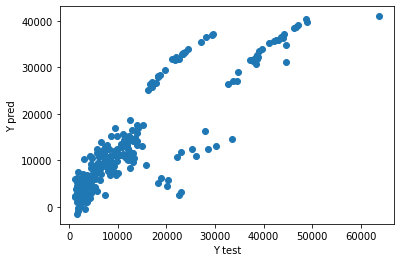

In [32]:
plt.scatter(y_test,Lin_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

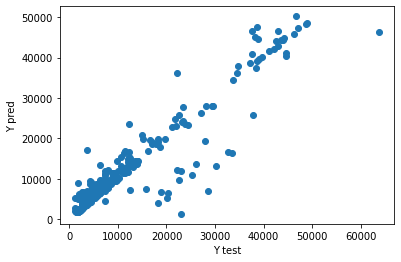

In [33]:
plt.scatter(y_test,Rand_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [34]:
a=input("what is the age of the patient admitted  ?")
b=input("what is the sex of the patient admitted ?")
c=input("what is the bmi of the patient admitted ?")
d=input("what is the number of children of the patient admitted  ?")
e=input("is the patient a smoker  ?")
f=input("what is the region of the patient admitted ?")
data = {'age':a,'sex':b,'bmi':c,'children':d,'smoker':e,'region':f}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

what is the age of the patient admitted  ?10
what is the sex of the patient admitted ?0
what is the bmi of the patient admitted ?30
what is the number of children of the patient admitted  ?3
is the patient a smoker  ?0
what is the region of the patient admitted ?1


,age,sex,bmi,children,smoker,region
0,10,0,30,3,0,1


In [35]:
costpredLin = Lin_reg.predict(cust_df)
costpredRand = Rand_reg.predict(cust_df)

print("The medical insurance cost of the new customer under Linear regression is: ", costpredLin)
print("The medical insurance cost of the new customer under Random forest regression is: ", costpredRand)

The medical insurance cost of the new customer under Linear regression is:  [1701.39090086]
The medical insurance cost of the new customer under Random forest regression is:  [12850.0465455]


In [36]:
large=[costpredLin,costpredRand]
large.sort(reverse=True)
print(f"The amount to be paid at hospital for the mentioned patient is:- {large[0]}")

The amount to be paid at hospital for the mentioned patient is:- [12850.0465455]
